In [1]:
# Import the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [2]:
# Load the dataset
coca_cola  = pd.read_excel("/content/CocaCola_Sales_Rawdata.xlsx" )
coca_cola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


## EDA Preocess

In [3]:
coca_cola.head(10) 

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [4]:
coca_cola1 = coca_cola.copy()

In [5]:
coca_cola1.head().T

,0,1,2,3,4
Quarter,Q1_86,Q2_86,Q3_86,Q4_86,Q1_87
Sales,1734.827,2244.960999,2533.804993,2154.962997,1547.818996


In [6]:
coca_cola1.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [7]:
coca_cola1.shape

(42, 2)

In [8]:
coca_cola1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [9]:
coca_cola1[coca_cola1.duplicated()].shape

(0, 2)

In [10]:
coca_cola1.dtypes

Quarter     object
Sales      float64
dtype: object

In [11]:
temp = coca_cola1.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')

In [12]:
coca_cola1['quater'] = pd.to_datetime(temp).dt.strftime('%b-%Y')

In [13]:
coca_cola1.head()

,Quarter,Sales,quater
0,Q1_86,1734.827000,Jan-1986
1,Q2_86,2244.960999,Apr-1986
2,Q3_86,2533.804993,Jul-1986
3,Q4_86,2154.962997,Oct-1986
4,Q1_87,1547.818996,Jan-1987


In [15]:
coca_cola1 = coca_cola1.drop(['Quarter'], axis=1)

In [17]:
coca_cola1.reset_index(inplace=True)

In [18]:
coca_cola1['quater'] = pd.to_datetime(coca_cola1['quater'])

In [19]:
coca_cola1 = coca_cola1.set_index('quater')

In [20]:
coca_cola1.head()

,index,Sales
quater,,
1986-01-01,0,1734.827000
1986-04-01,1,2244.960999
1986-07-01,2,2533.804993
1986-10-01,3,2154.962997
1987-01-01,4,1547.818996


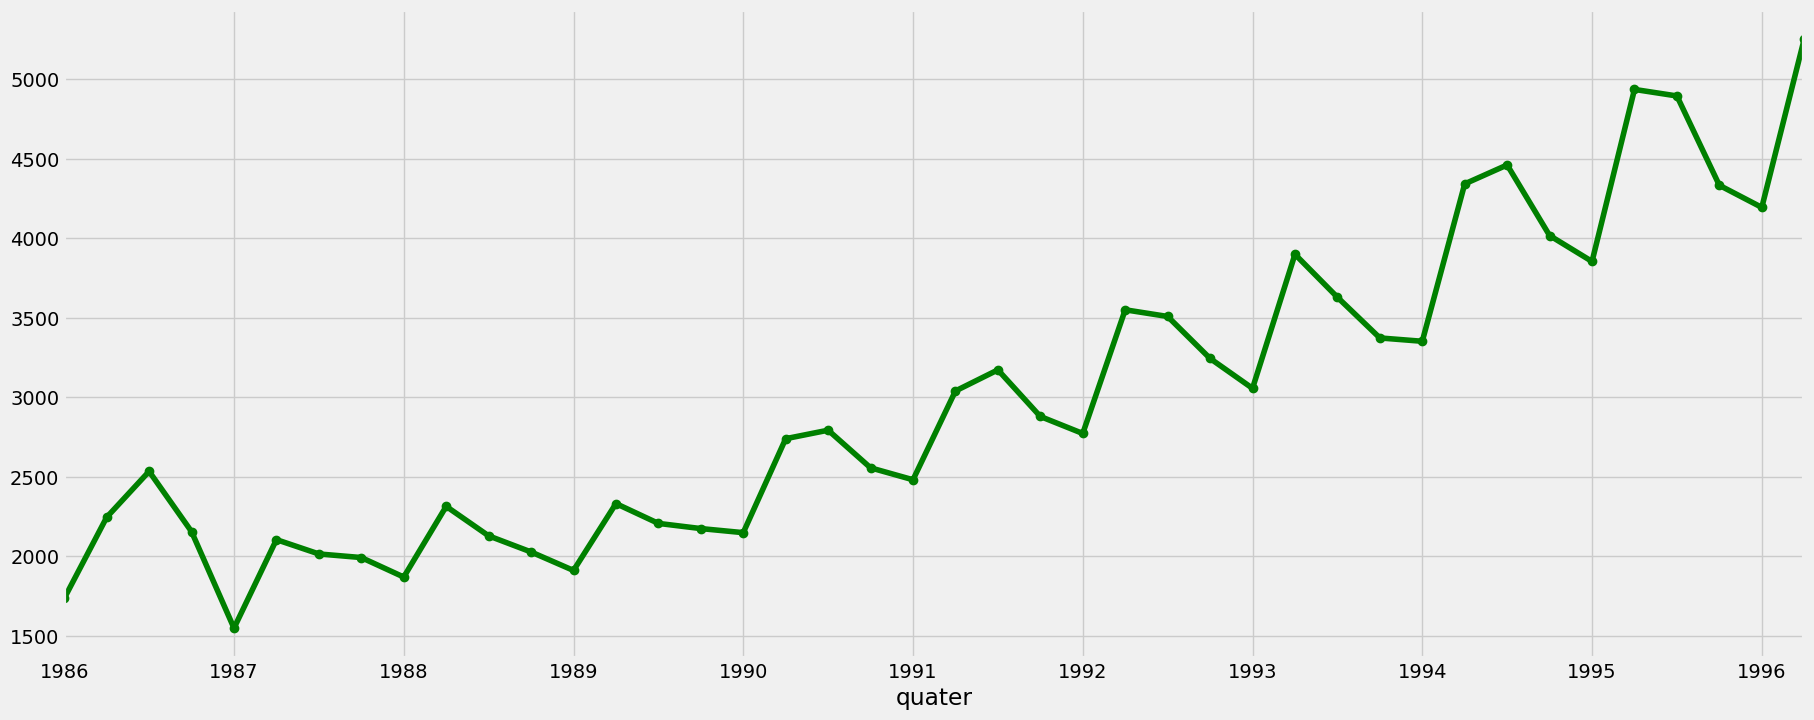

In [21]:
coca_cola1['Sales'].plot(figsize=(20, 8),color='green',marker='o')
plt.show()

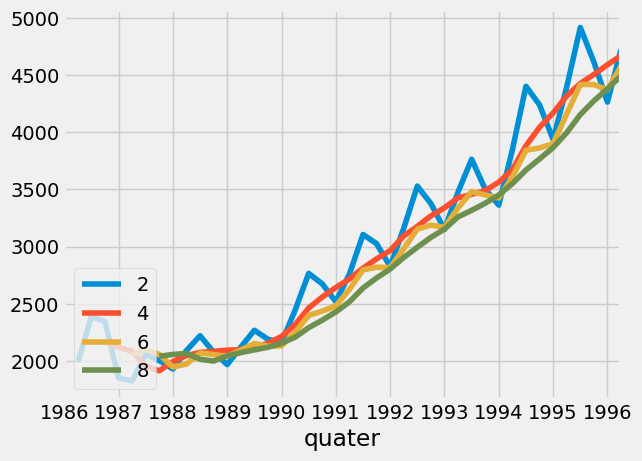

In [22]:
for i in range(2,10,2):
    coca_cola1["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

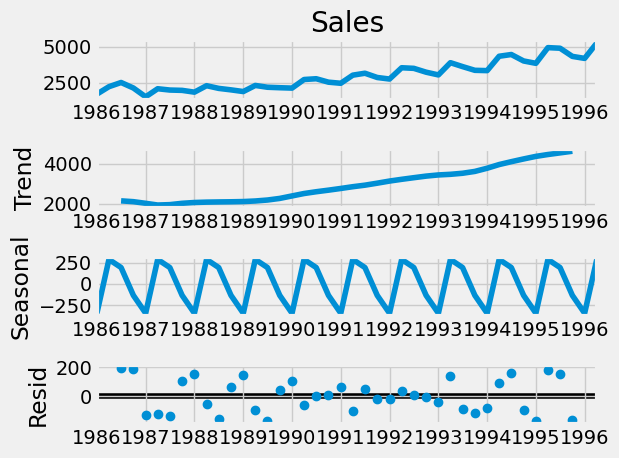

In [23]:
ts_add = seasonal_decompose(coca_cola1.Sales,model="additive")
fig = ts_add.plot()
plt.show()

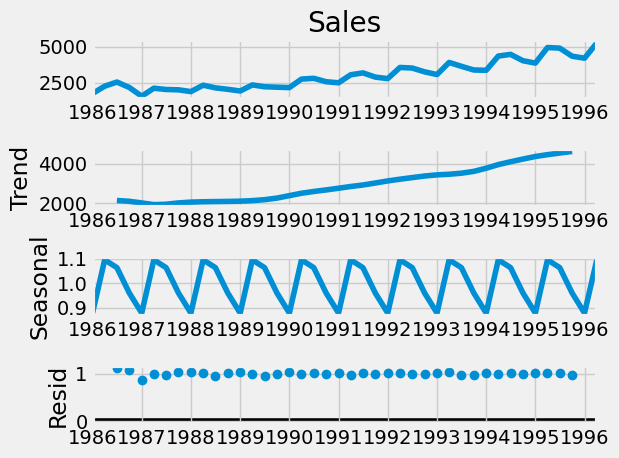

In [26]:
ts_mul = seasonal_decompose(coca_cola1.Sales,model="multiplicative")
fig = ts_mul.plot()
plt.show()

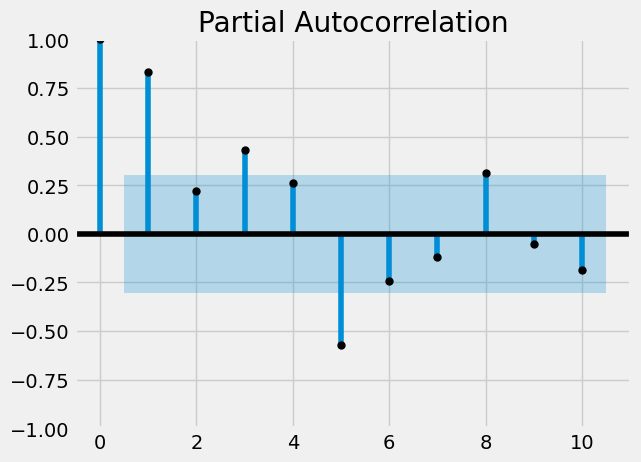

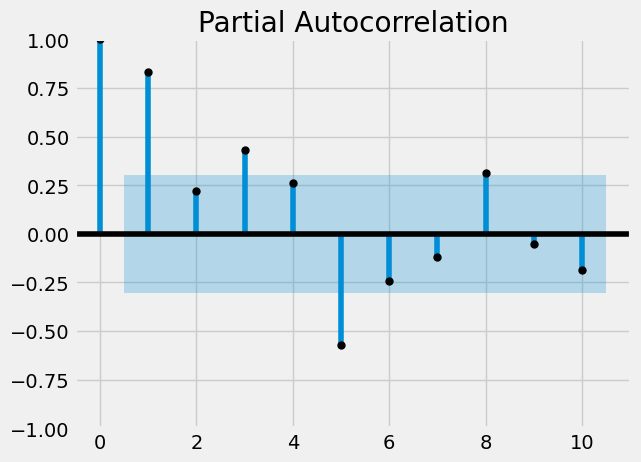

In [29]:
 tsa_plots.plot_pacf(coca_cola1.Sales, lags=10,color='black')

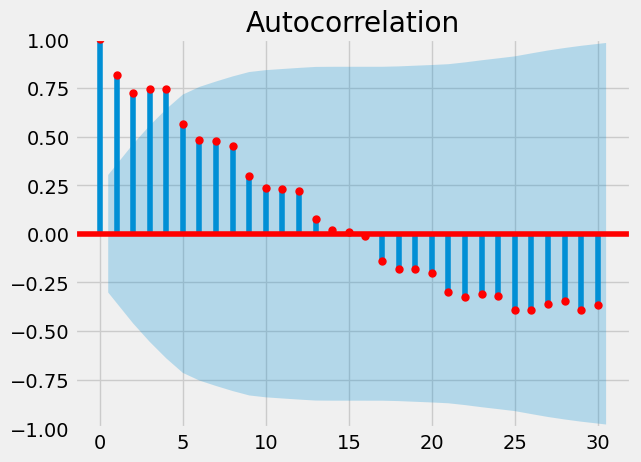

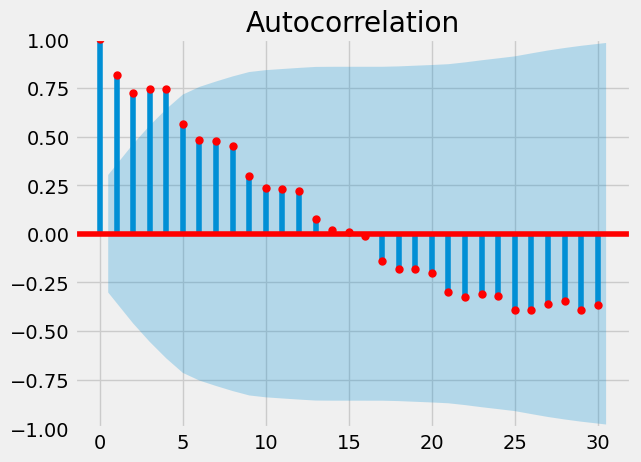

In [28]:
tsa_plots.plot_acf(coca_cola1.Sales, lags=30,color='red')

## Building Time Series Forecasting with ARIMA

In [30]:
X = coca_cola1['Sales'].values

In [31]:
size = int(len(X) * 0.66)

In [32]:
train, test = X[0:size], X[size:len(X)]

In [33]:
from statsmodels.tsa.arima.model import ARIMA

In [34]:
model = ARIMA(train, order=(5,1,0))

In [35]:
model_fit = model.fit()

In [36]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   27
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -174.082
Date:                Tue, 25 Apr 2023   AIC                            360.163
Time:                        14:11:03   BIC                            367.712
Sample:                             0   HQIC                           362.337
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1024      0.306     -0.335      0.738      -0.702       0.497
ar.L2         -0.2140      0.160     -1.338      0.181      -0.527       0.099
ar.L3         -0.0892      0.191     -0.468      0.6

In [ ]:
##This summarizes the coefficient values used as well as the skill
## of the fit on the on the in-sample observations

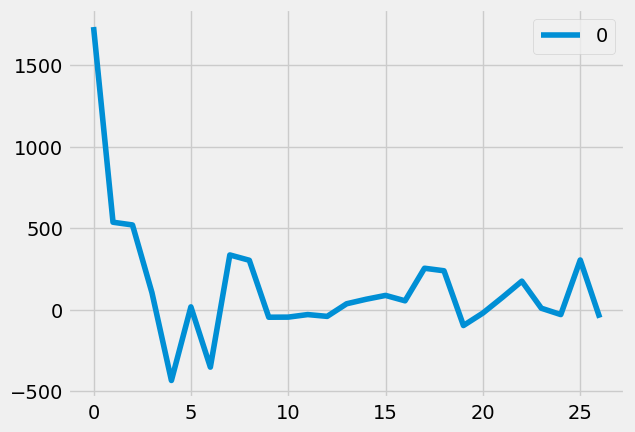

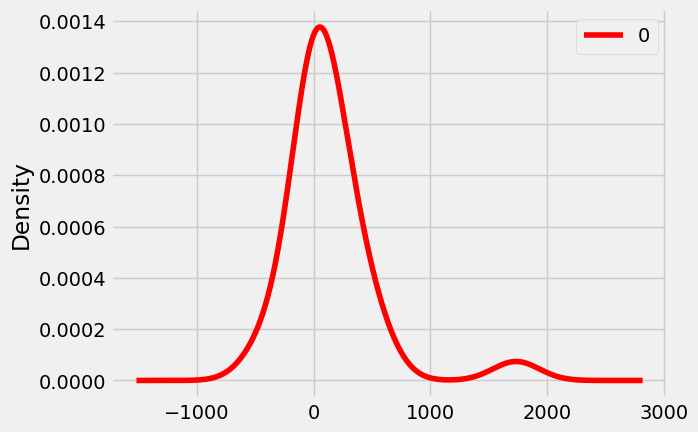

                 0
count    27.000000
mean    137.791854
std     385.970462
min    -433.659591
25%     -34.938856
50%      55.067398
75%     247.080157
max    1734.827000


In [37]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde',color='red')
pyplot.show()
print(residuals.describe())

In [ ]:
## The plot of the residual errors suggests that there may still be some
## trend information not captured by the model.
##The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals)The results show that indeed there is a bias in the prediction 
##(a non-zero mean in the residuals).

# Rolling Forecast ARIMA Model

In [38]:
history = [x for x in train]

In [39]:
predictions = list()

In [40]:
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=3130.132560, expected=3243.859993
predicted=3167.315971, expected=3056.000000
predicted=3717.472606, expected=3899.000000
predicted=3775.837500, expected=3629.000000
predicted=3332.744953, expected=3373.000000
predicted=3258.575374, expected=3352.000000
predicted=4081.006044, expected=4342.000000
predicted=3955.784129, expected=4461.000000
predicted=4146.277764, expected=4017.000000
predicted=3958.436605, expected=3854.000000
predicted=4701.652928, expected=4936.000000
predicted=4990.071243, expected=4895.000000
predicted=4390.352764, expected=4333.000000
predicted=4190.945470, expected=4194.000000
predicted=5177.006981, expected=5253.000000


In [41]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 34279.908


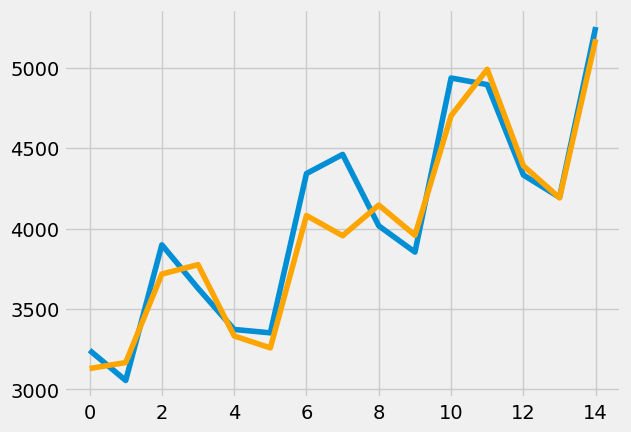

In [42]:
pyplot.plot(test)
pyplot.plot(predictions, color='orange')
pyplot.show()

In [ ]:
##A line plot is created showing the expected values (blue) compared to
# the rolling forecast predictions (red). We can see the values show 
#some trend and are in the correct scale

##  Comparing Multiple Models

In [52]:
coca2 = pd.get_dummies(coca_cola, columns = ['Quarter'])

In [53]:
coca2.columns = ['Sales','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4']


In [54]:
coca2.head().T

,0,1,2,3,4
Sales,1734.827,2244.960999,2533.804993,2154.962997,1547.818996
Q1,1.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,1.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000


In [55]:
t= np.arange(1,43)

In [56]:
coca2['t'] = t

In [57]:
coca2['t_sq'] = coca2['t']*coca2['t']


In [58]:
log_Sales=np.log(coca2['Sales'])

In [59]:
coca2['log_Sales']=log_Sales

In [60]:
coca2.head().T

,0,1,2,3,4
Sales,1734.827000,2244.960999,2533.804993,2154.962997,1547.818996
Q1,1.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,1.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000


In [61]:
train1, test1 = np.split(coca2, [int(.67 *len(coca2))])

In [62]:
linear= smf.ols('Sales ~ t',data=train1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin=np.sqrt((np.mean(np.array(test1['Sales'])-np.array(predlin))**2))
rmselin

580.1224130918635

In [63]:
quad=smf.ols('Sales~t+t_sq',data=train1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmsequad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predquad))**2))
rmsequad

783.7297975037553

In [64]:
expo=smf.ols('log_Sales~t',data=train1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmseexpo=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

588.1405104900199

In [65]:
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train1).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmseadd=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predadd))**2))
rmseadd

1869.7188209186954

In [66]:
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmseaddlinear=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

596.1526282372298

In [67]:
addquad=smf.ols('Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test1[['t','t_sq','Q1','Q2','Q3','Q4']])))
rmseaddquad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddquad))**2))
rmseaddquad

412.1144436053725

In [68]:
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train1).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmsemul= np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

2374.9194407954424

In [69]:
mullin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmsemulin=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemulin

5359.6879119332325

In [70]:
mul_quad= smf.ols('log_Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test1[['t','t_sq','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

3630.56194673477

## Conclusion

In [75]:
output = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
          'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmse])}

In [76]:
rmse=pd.DataFrame(output)

In [77]:
print(rmse)

           Model                         Values
0  rmse_mul_quad                    3630.561947
1        rmseadd                    1869.718821
2  rmseaddlinear                     596.152628
3    rmseaddquad                     412.114444
4       rmseexpo               0
0  5177.006981
5        rmselin                            NaN
6        rmsemul                            NaN
7      rmsemulin                            NaN
8       rmsequad                            NaN


In [ ]:
##Additive seasonality with quadratic trend has the best RMSE value